In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('Car.csv')

In [3]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
data.shape

(804, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
data.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073875,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995020,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316635,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

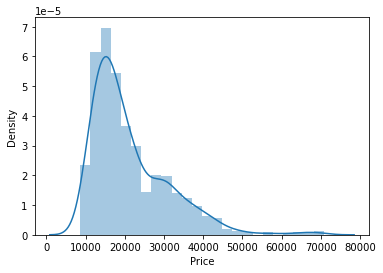

In [9]:
sns.distplot(data['Price'])

<AxesSubplot:ylabel='Price'>

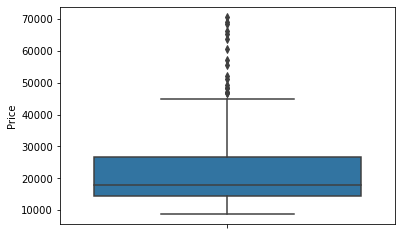

In [10]:
sns.boxplot(y = data['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

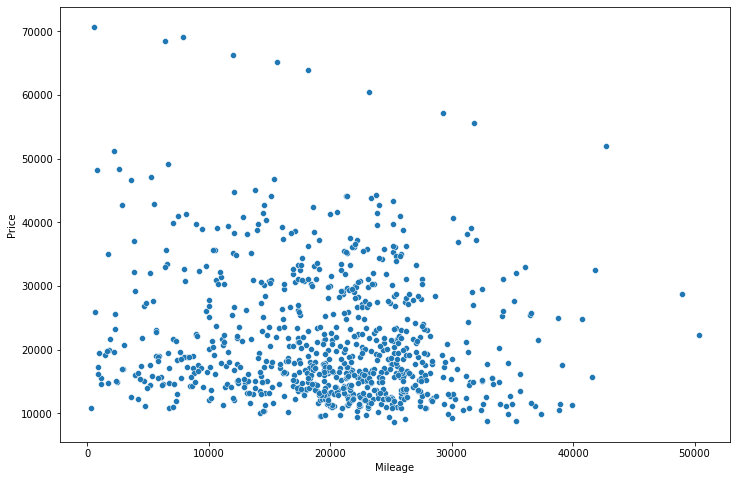

In [11]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Mileage", y = "Price", data = data)

In [12]:
#I want to know the count of manufacturing of each car company

data['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Cadillac      80
Buick         80
Saturn        60
Name: Make, dtype: int64

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Make', ylabel='count'>

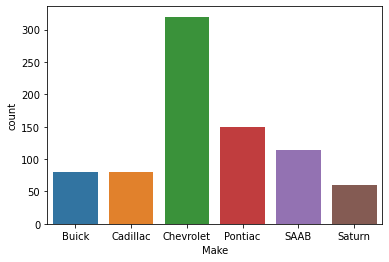

In [13]:
#Plot a count plot based on the make

sns.countplot(data["Make"])

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


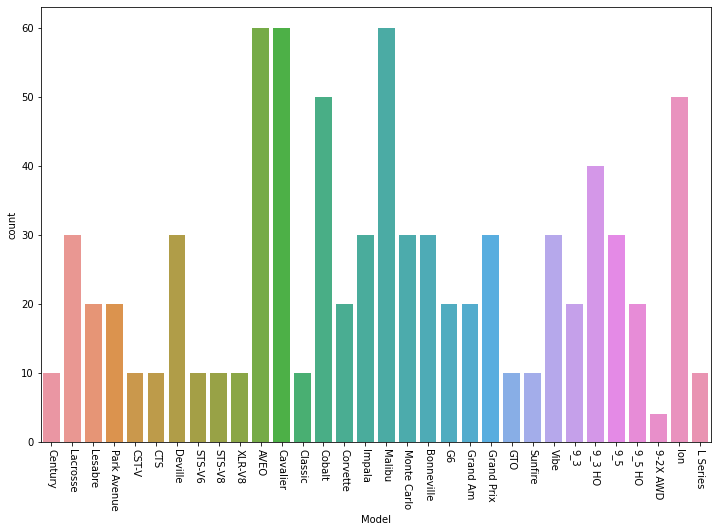

In [14]:
#Plot a count plot for models. Plot the model names on X-axis

plt.figure(figsize = (12,8))

sns.countplot(data["Model"])
plt.xticks(rotation = 270)
plt.show()

In [15]:
#Transformation

#MinMaxScaler Operation

from sklearn.preprocessing import MinMaxScaler

cat_col = ['Make', 'Model', 'Trim', 'Type']

df_2 = pd.get_dummies(data[cat_col], drop_first = True)

In [16]:
#MinMaxScaler iplementation

scale = MinMaxScaler()
data['Mileage1'] = scale.fit_transform(data[['Mileage']])

In [18]:
#Check the updated dataset
data.drop(cat_col, axis = 1, inplace = True)
data.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,8221,6,3.1,4,1,1,1,0.158716
1,17542.03608,9135,6,3.1,4,1,1,0,0.176952
2,16218.84786,13196,6,3.1,4,1,1,0,0.257976
3,16336.91314,16342,6,3.1,4,1,0,0,0.320744
4,16339.17032,19832,6,3.1,4,1,0,1,0.390375


In [19]:
data.drop('Mileage', axis = 1, inplace = True)

In [20]:
data.head()

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1
0,17314.10313,6,3.1,4,1,1,1,0.158716
1,17542.03608,6,3.1,4,1,1,0,0.176952
2,16218.84786,6,3.1,4,1,1,0,0.257976
3,16336.91314,6,3.1,4,1,0,0,0.320744
4,16339.17032,6,3.1,4,1,0,1,0.390375


In [21]:
data_new = pd.concat([data, df_2], axis = 1)

In [22]:
data_new

,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage1,Make_Cadillac,Make_Chevrolet,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,6,3.1,4,1,1,1,0.158716,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17542.03608,6,3.1,4,1,1,0,0.176952,0,0,...,0,0,0,1,0,0,0,0,1,0
2,16218.84786,6,3.1,4,1,1,0,0.257976,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16336.91314,6,3.1,4,1,0,0,0.320744,0,0,...,0,0,0,1,0,0,0,0,1,0
4,16339.17032,6,3.1,4,1,0,1,0.390375,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,6,3.0,4,1,0,0,0.318489,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.95760,6,3.0,4,1,1,0,0.375671,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.13290,6,3.0,4,1,1,0,0.403384,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.89323,6,3.0,4,1,1,0,0.513018,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#Implement Simple Linear Regression

x = data_new[['Mileage1']]
y = data_new[['Price']]

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [25]:
x_train.shape

(603, 1)

In [26]:
y_train.shape

(603, 1)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(x_test)

In [29]:
y_pred

array([[24352.79849704],
       [20902.81319976],
       [19894.66835083],
       [21620.4170541 ],
       [18714.57507683],
       [19170.58402821],
       [24960.01837499],
       [21033.50264343],
       [21365.08660382],
       [23549.22043018],
       [20254.11832482],
       [20587.43041008],
       [20129.69333382],
       [22627.26580938],
       [24473.55122268],
       [19261.31058415],
       [24470.74301976],
       [16785.98771635],
       [24360.79107459],
       [19164.75160676],
       [24197.48327391],
       [22439.76426045],
       [20669.73235725],
       [21159.65575931],
       [23418.74700212],
       [21596.22330585],
       [23419.39504895],
       [24261.20787867],
       [19636.96172884],
       [19850.60116651],
       [22291.36153681],
       [21347.58933946],
       [22899.01344597],
       [21354.71785457],
       [21889.35648777],
       [17886.5872461 ],
       [20939.31983775],
       [21014.2772542 ],
       [22967.92242536],
       [21840.75297566],


In [30]:
y_test

,Price
511,22736.83447
636,33287.40960
786,12594.18301
42,18145.12649
619,14869.28207
...,...
385,22894.43868
274,11574.17381
36,21341.25721
650,37088.56241


In [32]:
predict=lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, predict)

79102141.05645025